# Craft a Story from a Dataset

The purpose of this case study is to visualize the progression of the pandemic over the course of the past year.

Datasets utilized:

- Admin 0 - Countries dataset from Natural Earth
http://www.naturalearthdata.com/downloads/10m-cultural-vectors/

- Coronavirus (COVID-19) Cases
https://ourworldindata.org/covid-cases


We start by importing relevant packages:

    

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [189]:
df = pd.read_csv('covid_data.csv')
df.shape

(78664, 59)

Since I am predominantly interested in total_cases in countries over time, I subset the dataset to contain only a few of the rows in the initial file, and grouping by date and location.


In [190]:
subset1 = df[['total_cases', 'total_deaths', 'date', 'location']]

test = subset1.groupby(['date', 'location']).sum()

test1.reset_index()

test1.head()

,date,location,total_cases,total_deaths
0,2020-01-01,Argentina,0.0,0.0
1,2020-01-01,Mexico,0.0,0.0
2,2020-01-02,Argentina,0.0,0.0
3,2020-01-02,Mexico,0.0,0.0
4,2020-01-03,Argentina,0.0,0.0


Creation of a pivot_table allows for a new dataframe that indexed by date and each column is a different country.

We can then subset the columns of the 10 largest most populous countries in the world.

In [192]:
table = pd.pivot_table(test1, values='total_cases', index='date',
                    columns=['location'], aggfunc=np.sum)

countries = pd.DataFrame(table)

countries.head()


location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I'm just selecting the world's 10 top most populous countries.



In [194]:
countries = countries[['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']]

### Visualizing trends


This is a plot of the total daily cases for the top 10 most populous countries in the world.

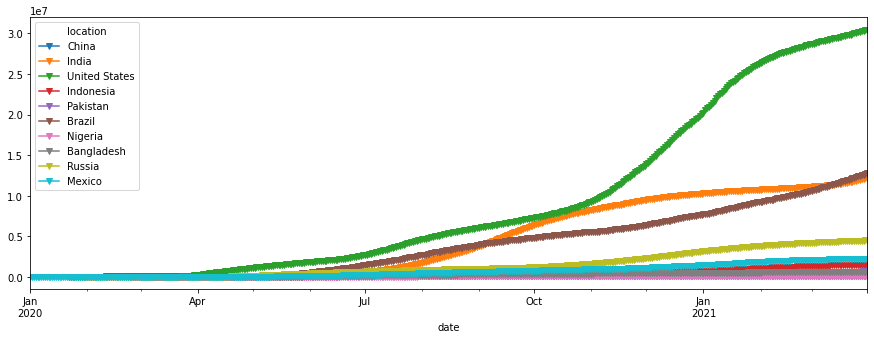

In [61]:
countries.plot(marker="v",figsize=(15,5))

This plot also shows daily cases, but resamples by month

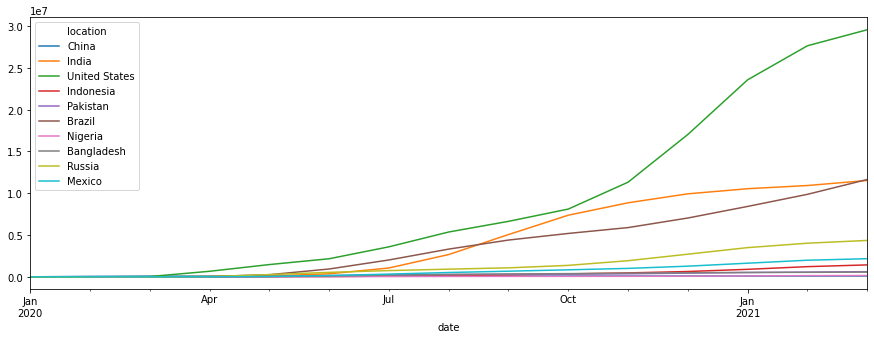

In [63]:
countries.resample('M').mean().plot(figsize = (15,5))

### Map of total cases by country

The new dataframe contains total cases by grouped by country.

In [195]:
totals = subset1[['total_cases', 'location']].groupby('location').sum().reset_index()

colors = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2019'
cols = ['Country Name', year]

In order to create a map in geopandas, I imported a shapefile from Natural Earth with polygons for each country.

In [197]:
test = 'ne_10m_admin_0_countries.shp'

gpd.read_file(test)

gdf = gpd.read_file('ne_10m_admin_0_countries.shp')[['SOVEREIGNT', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,SOVEREIGNT,geometry
121,Algeria,"POLYGON ((-443236.337 2673269.864, -459084.144..."
31,Republic of the Congo,"POLYGON ((1758470.348 371857.787, 1759259.848 ..."
29,Costa Rica,"MULTIPOLYGON (((-7859713.528 1168549.188, -785..."
236,Nauru,"POLYGON ((15771587.851 -52450.405, 15773163.49..."
52,Latvia,"POLYGON ((2111191.184 6091885.462, 2124699.738..."


The columns SOVEREIGNT and location in respective datasets both contain the name of the country. The next step is to perform a merge of the two datasets.

In [128]:
merged = gdf.merge(totals, left_on= 'SOVEREIGNT', right_on = 'location')

merged.head()

,SOVEREIGNT,geometry,location,total_cases
0,Indonesia,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,166994097.0
1,Malaysia,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Malaysia,28672066.0
2,Chile,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Chile,162925591.0
3,Bolivia,"POLYGON ((-6477059.899 -1872360.838, -6477072....",Bolivia,43103860.0
4,Peru,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Peru,256326552.0


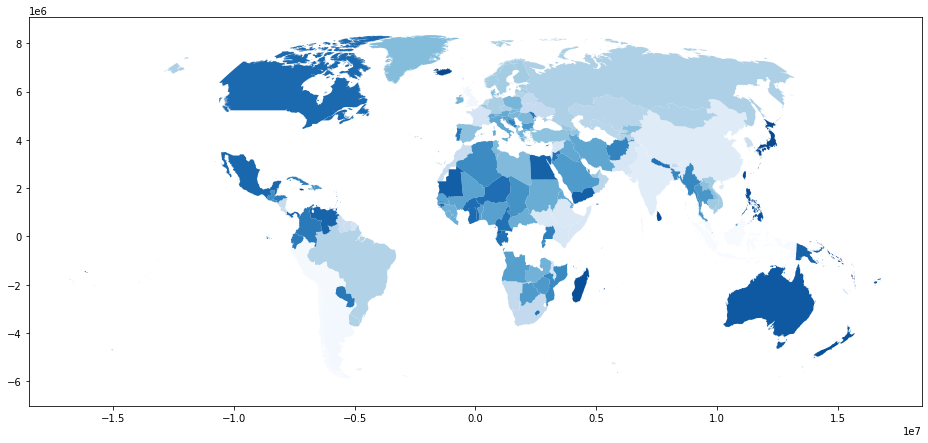

In [129]:
ax = merged.dropna().plot(cmap=cmap, figsize = figsize, scheme = 'equal_interval', k = colors, legend = True)

### Total covid cases computed as a percentage



In [150]:
tables = pd.pivot_table(subset1, values='total_cases',
                    columns=['location'], aggfunc=np.sum)

table_df = pd.DataFrame(tables)

Perhaps looking at the total cases by continent would be interesting.

In [155]:
table_df[['Asia', 'Europe', 'Africa', 'Australia', 'South America', 'North America']]

location,Asia,Europe,Africa,Australia,South America,North America
total_cases,4.246183e+09,4.642085e+09,623609882.0,7693075.0,3.034671e+09,4.807592e+09


In [177]:
countries_list  =['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico']
total_largest  = totals[totals.location.isin(countries_list)]

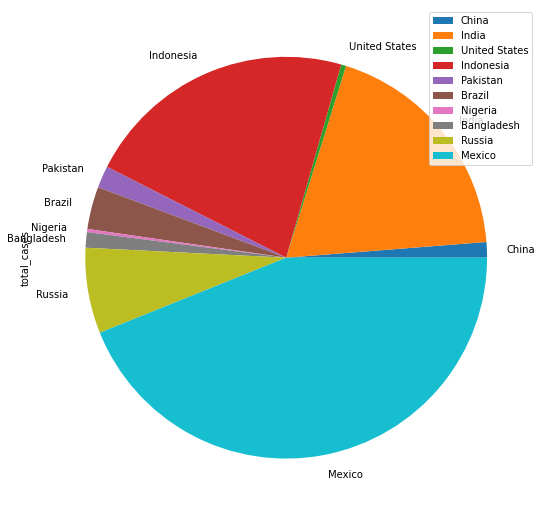

In [185]:
labels = countries_list
total_largest.plot.pie(y = 'total_cases', labels = labels, figsize = (9,12))